1, Viết hàm sigmoid, tính sigmoid của -4, -2, -1, 0, 1, 3, 6.


In [1]:
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [2]:
sigmoid(np.array([-4, -2, -1, 0, 1, 3, 6]))

array([0.01798621, 0.11920292, 0.26894142, 0.5       , 0.73105858,
       0.95257413, 0.99752738])


2, Vẽ hàm sigmoid dùng matplotlib.( vẽ theo công thức )


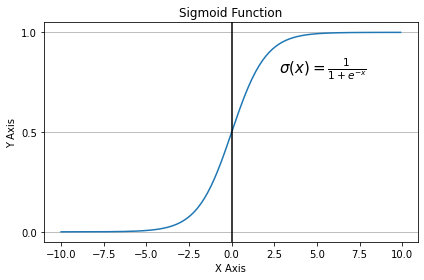

In [3]:
import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.1)
 
# Invoking Sigmoid function on all Z points

phi_z = sigmoid(z)
 
# Plotting the Sigmoid function

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.text(2.8,0.8,r'$\sigma(x)=\frac{1}{1+e^{-x}}$',fontsize=15)
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

3, Viết hàm tính binary_crossentropy, tính loss với y = [1, 0, 1, 1, 0], y_predict = [0.8, 0.5, 0.9, 0.9, 0.1]. So sánh kết quả với hàm log_loss có sẵn.


In [ ]:
def binary_crossentropy(y, y_predict):
  y = np.array(y)
  y_predict = np.array(y_predict)
  loss = np.array([-(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))]).mean()
  return loss

In [ ]:
y = [1, 0, 1, 1, 0]
y_predict = [0.8, 0.5, 0.9, 0.9, 0.1]

In [ ]:
binary_crossentropy(y, y_predict)

0.24647445576952678

In [ ]:
from sklearn.metrics import log_loss
log_loss(y, y_predict)

0.24647445576952678

4, Dùng hàm load_digits trong sklearn load dataset và dùng logistic regression để phân loại các số. Tính accuracy, precision, recall, f1, classification_report, confusion matrix của model.

In [ ]:
from sklearn.datasets import load_digits
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
digits = load_digits()


In [ ]:
digits.data.shape

(1797, 64)

<Figure size 432x288 with 0 Axes>

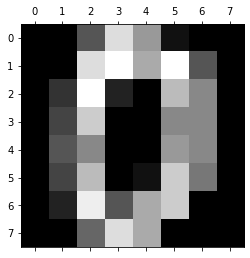

In [ ]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [ ]:
# flatten the images: turning each 2-D array of (8,8) into shape (64,)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [ ]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)


In [ ]:
# create a model clasification:
model = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

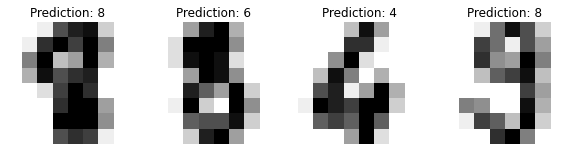

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))


for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
metrics.accuracy_score(y_test, predicted)

0.9299221357063404

In [ ]:
metrics.precision_score(y_test, predicted, average = None)

array([0.98823529, 0.94252874, 0.98823529, 0.9382716 , 0.97674419,
       0.87755102, 0.90909091, 0.97701149, 0.88764045, 0.84313725])

In [ ]:
metrics.recall_score(y_test, predicted, average = None)

array([0.95454545, 0.9010989 , 0.97674419, 0.83516484, 0.91304348,
       0.94505495, 0.98901099, 0.95505618, 0.89772727, 0.93478261])

In [ ]:
metrics.f1_score(y_test, predicted, average = None)

array([0.97109827, 0.92134831, 0.98245614, 0.88372093, 0.94382022,
       0.91005291, 0.94736842, 0.96590909, 0.89265537, 0.88659794])

In [ ]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        88
           1       0.94      0.90      0.92        91
           2       0.99      0.98      0.98        86
           3       0.94      0.84      0.88        91
           4       0.98      0.91      0.94        92
           5       0.88      0.95      0.91        91
           6       0.91      0.99      0.95        91
           7       0.98      0.96      0.97        89
           8       0.89      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  1  0  0  0 86  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


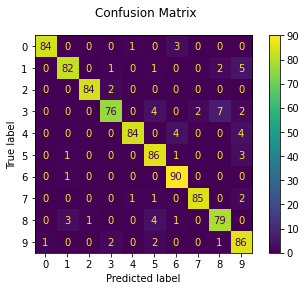

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()